In [82]:
import os
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

In [88]:
correl = "LC"
if correl == "LC": 
    CaseNames_Base = ['9n_mod1',"RTS24_mod1","IEEE118_mod1"]
elif correl == "HC": 
    CaseNames_Base = ['9n',"RTS24","IEEE118"]

CaseNames_ByStages = [CaseName_Base + '_ByStages_nc' for CaseName_Base in CaseNames_Base]


Folder_A = 'A.The_full_year_MILP'
Folder_AWOI = 'A.The_full_year_WOI'
Folder_B = 'B.Operation_cost'
Folder_D = 'D.Representative_days_based_on_RES_and_Demand'
Folder_E = 'E.Representative_days_based_on_Line_Benefits_OptModel'
Folder_F = 'F.Representative_days_based_on_Line_Benefit_NN_OC_fy_1'
Folder_G = 'G.Representative_days_based_on_Line_Benefit_NN_OC_fy_2'
Folder_K = 'K.Investments_per_hour'
Folder_L = 'L.Cont_Investments_per_hour'
# Folder_H = 'H.Representative_days_based_on_Line_Benefit_NN_OC_fy_3'
# Folder_I = 'I.Representative_days_based_on_Line_Benefit_NN_OC_fy_4'
Folder_JB = 'J.Full_year_operational_cost\\Results\\B.Operation_cost'
Folder_JD = 'J.Full_year_operational_cost\\Results\\D.Representative_days_based_on_RES_and_Demand'
Folder_JE = 'J.Full_year_operational_cost\\Results\\E.Representative_days_based_on_Line_Benefits_OptModel'
Folder_JF = 'J.Full_year_operational_cost\\Results\\F.Representative_days_based_on_Line_Benefit_NN_OC_fy_1'
Folder_JG = 'J.Full_year_operational_cost\\Results\\G.Representative_days_based_on_Line_Benefit_NN_OC_fy_2'
Folder_JK = 'J.Full_year_operational_cost\\Results\\K.Investments_per_hour'
Folder_JL = 'J.Full_year_operational_cost\\Results\\L.Cont_Investments_per_hour'

DirName  = os.getcwd()
category_dict = {Folder_A: "FYMILP",
                 Folder_AWOI: "WOI",
                 Folder_B: "OPC",
                 Folder_D: "R&D",
                 Folder_E: "OPT_LB",
                 #Folder_F: "NN_LB1",
                 #Folder_G: "NN_LB2",
                 Folder_K: "HI",
                 Folder_L: "CHI",
                 Folder_JB: "OPC_fy",
                 Folder_JD: "R&D_fy",
                 Folder_JE: "OPT_LB_fy",
                 #Folder_JF: "NN_LB_fy1",
                 #Folder_JG: "NN_LB_fy2",
                 Folder_JK: "HI_fy",
                 Folder_JL: "CHI_fy"
                }
# category_dict = {Folder_A: "FYMILP",Folder_D: "R&D"}
# colors_dict = { "FYMILP": "Blue","R&D": "Red","OPT_LB": "Black","NN_OPCOST": "Orange" ,Folder_G: "Green"}
colors_dict = { "FYMILP": "Blue","R&D": "Red"}

In [89]:
def LoadingData(dir, folder,result, case, ncluster, cm):
    if folder == 'A.The_full_year_MILP': 
        df = pd.read_csv(os.path.join(dir, folder, case, '3.Out', f'oT_Result_{result}_'+case+'.csv'), index_col=[0,1])
    if folder == 'A.The_full_year_WOI': 
        df = pd.read_csv(os.path.join(dir,'A.The_full_year_MILP' , case, '4.OutWoInv', f'oT_Result_{result}_'+case+'.csv'), index_col=[0,1])
    else: 
        #df = pd.read_csv(os.path.join(dir, folder, case+'_ByStages_nc'+str(ncluster), '4.OutWoInv', f'oT_Result_{result}_'+case+ '_ByStages_nc'+str(ncluster)+'.csv'), index_col=[0,1])
        df = pd.read_csv(os.path.join(dir, folder, case+'_ByStages_nc'+str(ncluster), '3.Out', f'oT_Result_{result}_'+case+ '_ByStages_nc'+str(ncluster)+'.csv'), index_col=[0,1])

    df['CaseName'] = folder + ' - ' + case + str(ncluster)
    df['Case'] = case
    df['Clustering method'] = cm
#     df['Category2'] = cat2
#     df['Category3'] = cat3
    df['Number of clusters'] = ncluster
    df = df.reset_index()
#df = df.reset_index().set_index(['CaseName', 'Category1', 'Category2', 'Category3', 'Category4'])
    # df = df.set_index('CaseName', append=True)
    return df

In [90]:
result = "CostSummary"
#nbs_clusters = [(i+2)*10 for i in range(9)] + [150, 200, 250, 300, 350, 400]
nbs_clusters = [(i+1)*10 for i in range(15)] + [200, 250, 300, 350, 400]
#nbs_clusters = [20,50,100,200]
#nbs_clusters = [(i+5)*10 for i in range(5)] + [150, 200, 250, 300, 350, 400]
# nbs_clusters = [(i+1)*10 for i in range(9)]
#nbs_clusters = [(i+1)*10 for i in range(2)]
#folders = [Folder_A,Folder_AWOI, Folder_B,Folder_D, Folder_E,Folder_K,Folder_L,Folder_JB, Folder_JD,Folder_JE,Folder_JK,Folder_JL]#,Folder_E,Folder_F,Folder_G]
folders = [Folder_B,Folder_D, Folder_E,Folder_K,Folder_L,Folder_JB, Folder_JD,Folder_JE,Folder_JK,Folder_JL]#,Folder_E,Folder_F,Folder_G]

#folders = [Folder_D,Folder_B, Folder_E,Folder_L,Folder_JB, Folder_JD,Folder_JE,Folder_JL]#,Folder_E,Folder_F,Folder_G]

#folders = [Folder_A,Folder_D]
results = ["CostSummary"]

results_dfs = dict()
for CaseName_Base in CaseNames_Base:
    results_dfs[CaseName_Base] = dict()
    for result in results:
        results_dfs[CaseName_Base][result] = dict()
        for folder in folders: 
            results_dfs[CaseName_Base][result][folder] = dict()
            for nb_clusters in nbs_clusters:
                try: 
                    results_dfs[CaseName_Base][result][folder][nb_clusters] = LoadingData(DirName, folder,result, CaseName_Base, nb_clusters, category_dict[folder])
                except FileNotFoundError as e : 
                    print(e)
                    print(CaseName_Base,folder,nb_clusters, "Does not contain", result)

[Errno 2] No such file or directory: 'C:\\Users\\u0138303\\OneDrive - KU Leuven\\JointResearch\\05. Models\\06.Benchmarking\\B.Operation_cost\\9n_mod1_ByStages_nc110\\3.Out\\oT_Result_CostSummary_9n_mod1_ByStages_nc110.csv'
9n_mod1 B.Operation_cost 110 Does not contain CostSummary
[Errno 2] No such file or directory: 'C:\\Users\\u0138303\\OneDrive - KU Leuven\\JointResearch\\05. Models\\06.Benchmarking\\B.Operation_cost\\9n_mod1_ByStages_nc120\\3.Out\\oT_Result_CostSummary_9n_mod1_ByStages_nc120.csv'
9n_mod1 B.Operation_cost 120 Does not contain CostSummary
[Errno 2] No such file or directory: 'C:\\Users\\u0138303\\OneDrive - KU Leuven\\JointResearch\\05. Models\\06.Benchmarking\\B.Operation_cost\\9n_mod1_ByStages_nc130\\3.Out\\oT_Result_CostSummary_9n_mod1_ByStages_nc130.csv'
9n_mod1 B.Operation_cost 130 Does not contain CostSummary
[Errno 2] No such file or directory: 'C:\\Users\\u0138303\\OneDrive - KU Leuven\\JointResearch\\05. Models\\06.Benchmarking\\B.Operation_cost\\9n_mod1_ByS

[Errno 2] No such file or directory: 'C:\\Users\\u0138303\\OneDrive - KU Leuven\\JointResearch\\05. Models\\06.Benchmarking\\J.Full_year_operational_cost\\Results\\E.Representative_days_based_on_Line_Benefits_OptModel\\9n_mod1_ByStages_nc110\\3.Out\\oT_Result_CostSummary_9n_mod1_ByStages_nc110.csv'
9n_mod1 J.Full_year_operational_cost\Results\E.Representative_days_based_on_Line_Benefits_OptModel 110 Does not contain CostSummary
[Errno 2] No such file or directory: 'C:\\Users\\u0138303\\OneDrive - KU Leuven\\JointResearch\\05. Models\\06.Benchmarking\\J.Full_year_operational_cost\\Results\\E.Representative_days_based_on_Line_Benefits_OptModel\\9n_mod1_ByStages_nc120\\3.Out\\oT_Result_CostSummary_9n_mod1_ByStages_nc120.csv'
9n_mod1 J.Full_year_operational_cost\Results\E.Representative_days_based_on_Line_Benefits_OptModel 120 Does not contain CostSummary
[Errno 2] No such file or directory: 'C:\\Users\\u0138303\\OneDrive - KU Leuven\\JointResearch\\05. Models\\06.Benchmarking\\J.Full_year

[Errno 2] No such file or directory: 'C:\\Users\\u0138303\\OneDrive - KU Leuven\\JointResearch\\05. Models\\06.Benchmarking\\K.Investments_per_hour\\RTS24_mod1_ByStages_nc110\\3.Out\\oT_Result_CostSummary_RTS24_mod1_ByStages_nc110.csv'
RTS24_mod1 K.Investments_per_hour 110 Does not contain CostSummary
[Errno 2] No such file or directory: 'C:\\Users\\u0138303\\OneDrive - KU Leuven\\JointResearch\\05. Models\\06.Benchmarking\\K.Investments_per_hour\\RTS24_mod1_ByStages_nc120\\3.Out\\oT_Result_CostSummary_RTS24_mod1_ByStages_nc120.csv'
RTS24_mod1 K.Investments_per_hour 120 Does not contain CostSummary
[Errno 2] No such file or directory: 'C:\\Users\\u0138303\\OneDrive - KU Leuven\\JointResearch\\05. Models\\06.Benchmarking\\K.Investments_per_hour\\RTS24_mod1_ByStages_nc130\\3.Out\\oT_Result_CostSummary_RTS24_mod1_ByStages_nc130.csv'
RTS24_mod1 K.Investments_per_hour 130 Does not contain CostSummary
[Errno 2] No such file or directory: 'C:\\Users\\u0138303\\OneDrive - KU Leuven\\JointResea

[Errno 2] No such file or directory: 'C:\\Users\\u0138303\\OneDrive - KU Leuven\\JointResearch\\05. Models\\06.Benchmarking\\J.Full_year_operational_cost\\Results\\L.Cont_Investments_per_hour\\RTS24_mod1_ByStages_nc110\\3.Out\\oT_Result_CostSummary_RTS24_mod1_ByStages_nc110.csv'
RTS24_mod1 J.Full_year_operational_cost\Results\L.Cont_Investments_per_hour 110 Does not contain CostSummary
[Errno 2] No such file or directory: 'C:\\Users\\u0138303\\OneDrive - KU Leuven\\JointResearch\\05. Models\\06.Benchmarking\\J.Full_year_operational_cost\\Results\\L.Cont_Investments_per_hour\\RTS24_mod1_ByStages_nc120\\3.Out\\oT_Result_CostSummary_RTS24_mod1_ByStages_nc120.csv'
RTS24_mod1 J.Full_year_operational_cost\Results\L.Cont_Investments_per_hour 120 Does not contain CostSummary
[Errno 2] No such file or directory: 'C:\\Users\\u0138303\\OneDrive - KU Leuven\\JointResearch\\05. Models\\06.Benchmarking\\J.Full_year_operational_cost\\Results\\L.Cont_Investments_per_hour\\RTS24_mod1_ByStages_nc130\\3.

In [91]:
# Concatenate results dataframes 
results_dfs_concat = dict()
for result in results:
    results_dfs_concat[result] = pd.concat([results_dfs[CaseName_Base][result][folder][nb_clusters] for CaseName_Base in CaseNames_Base for folder in folders for nb_clusters in results_dfs[CaseName_Base][result][folder]])

In [92]:
#Pivot the system cost dataframe and rename some columns
results_dfs_pivot = results_dfs_concat["CostSummary"].pivot_table(values = "MEUR",columns = "Cost/Payment",index = ["Case","Clustering method", "Number of clusters"]).reset_index().set_index(["Case","Clustering method", "Number of clusters"])
results_dfs_pivot.rename({"Total          System Cost" : "TSC",'Network    Investment Cost' : "NIC" },axis = 1,inplace=True)

In [93]:
#Regular line plots
y = "NIC"
x = "Number of clusters"

rf = results_dfs_pivot.loc["9n"].loc[["R&D_fy"]]
#rf = results_dfs_pivot.loc[["R&D_fy","OPT_LB_fy"]]
sns.lineplot(data = rf,x = x, y = y,hue = "Clustering method",marker = "o")
#plt.ylim((76,77))
#plt.ylim((228,229))

#plt.savefig(f"Z.Figures/lineplot_{y}_{x}_{CaseName_Base}")

KeyError: '9n'

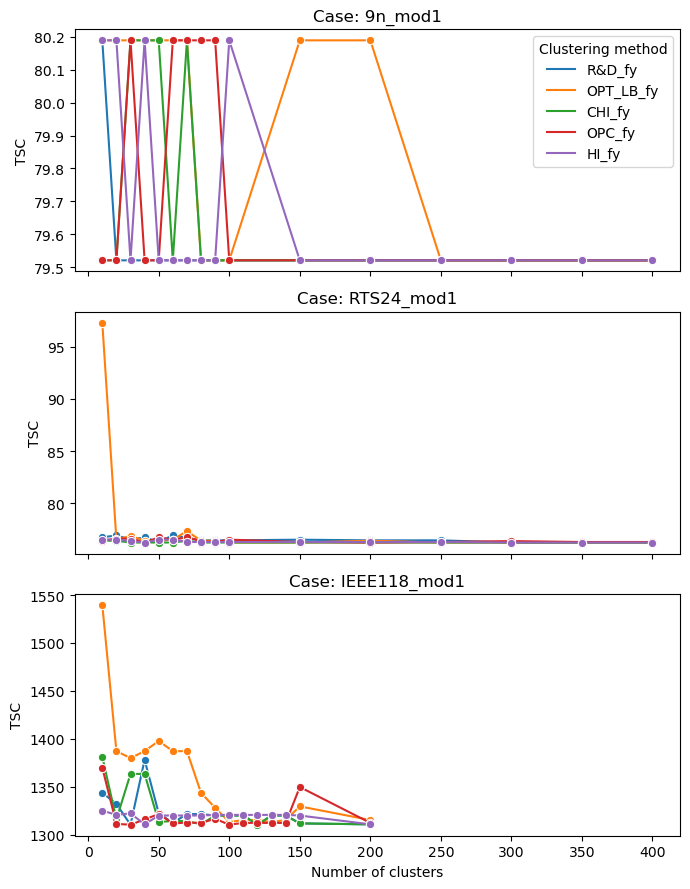

In [94]:
# Define variables
y = "TSC"
x = "Number of clusters"

# Define the different case names you want to plot
caseNames = CaseNames_Base
# Create subplots
fig, axes = plt.subplots(nrows=len(caseNames), ncols=1, figsize=(7, 9), sharex=True)

# Loop through each caseName and create a subplot
for i,(ax, caseName) in enumerate(zip(axes, caseNames)):
    # Select specific rows and columns from the DataFrame
    rf = results_dfs_pivot.loc[caseName].loc[["R&D_fy","OPT_LB_fy","CHI_fy","OPC_fy","HI_fy"]]
    #rf = results_dfs_pivot.loc[caseName].loc[["R&D","OPT_LB","CHI","OPC","HI"]]
    #rf = results_dfs_pivot.loc[caseName].loc[["","CHI_fy","HI_fy"]]
    
    # Create the line plot in the current subplot
    sns.lineplot(data=rf, x=x, y=y, hue="Clustering method", marker="o", ax=ax)
    
    # Set the title of the subplot to indicate the caseName
    ax.set_title(f"Case: {caseName}")
    
    if i != 0:
        ax.legend().remove()

# Adjust layout
plt.tight_layout()

# Optionally save the figure
#plt.savefig(f"Z.Figures/lineplot_subplots_fy_{y}_{correl}.png")

# Display the plot
plt.show()

## Save as latex compatible figure 

## Save data for tex figure 

In [ ]:
import numpy as np
#rf

In [55]:
results_dfs_pivot.loc["IEEE118_mod1"].loc[["R&D_fy","OPT_LB_fy","CHI_fy","OPC_fy","HI_fy"]].sort_values("TSC")["TSC"].iloc[0:20]

Clustering method  Number of clusters
R&D_fy             120                   1310.340627
CHI_fy             120                   1310.340627
OPC_fy             30                    1310.340627
                   100                   1310.340627
R&D_fy             30                    1310.340627
CHI_fy             80                    1310.725025
HI_fy              40                    1310.725025
OPC_fy             20                    1311.225205
CHI_fy             150                   1311.731007
OPC_fy             60                    1311.731007
R&D_fy             150                   1311.731007
OPC_fy             140                   1312.242538
                   110                   1312.242538
                   120                   1312.242538
R&D_fy             60                    1312.242538
OPC_fy             130                   1312.242538
                   80                    1312.242538
                   70                    1312.518628
OPT_LB_f

In [44]:
import pandas as pd
import os

# Define variables
y = "TSC"
x = "Number of clusters"

# Define the different case names you want to plot
caseNames = CaseNames_Base

# Directory to save CSV files
output_dir = "Z.Figures/data_for_latex"
os.makedirs(output_dir, exist_ok=True)
nbcs = [10,20,40,60,80,100,150,200,250,300,350,400]
# Export data for each case
for caseName in caseNames:
    if caseName.startswith("IEEE"):
        nbcs = [20,40,60,80,100,120,140]
    else:
        nbcs = [20,40,60,80,100,150,200,250,300,350,400]
    min_val = np.min(results_dfs_pivot.loc[caseName].loc[["R&D_fy","OPT_LB_fy","CHI_fy","OPC_fy","HI_fy"]]["TSC"])
    for cm in ["R&D_fy","OPT_LB_fy","CHI_fy","OPC_fy","HI_fy"]:
        rf = results_dfs_pivot.loc[caseName].loc[cm]
        csv_file = os.path.join(output_dir, f"{caseName.replace('_', '').replace('mod1', '')}_{cm.replace('_', '').replace('&', '')}_{correl}.csv")
        rf["Cost"] = ((rf["TSC"] /min_val)-1)*100
        print(min_val)
        rf[rf.index.isin(nbcs)]["Cost"].to_csv(csv_file)


101.3821196243105
101.3821196243105
101.3821196243105
101.3821196243105
101.3821196243105
228.25217651808285
228.25217651808285
228.25217651808285
228.25217651808285
228.25217651808285
1584.4030493927569
1584.4030493927569
1584.4030493927569
1584.4030493927569
1584.4030493927569


ValueError: Could not interpret value `Dev_TSC` for parameter `y`

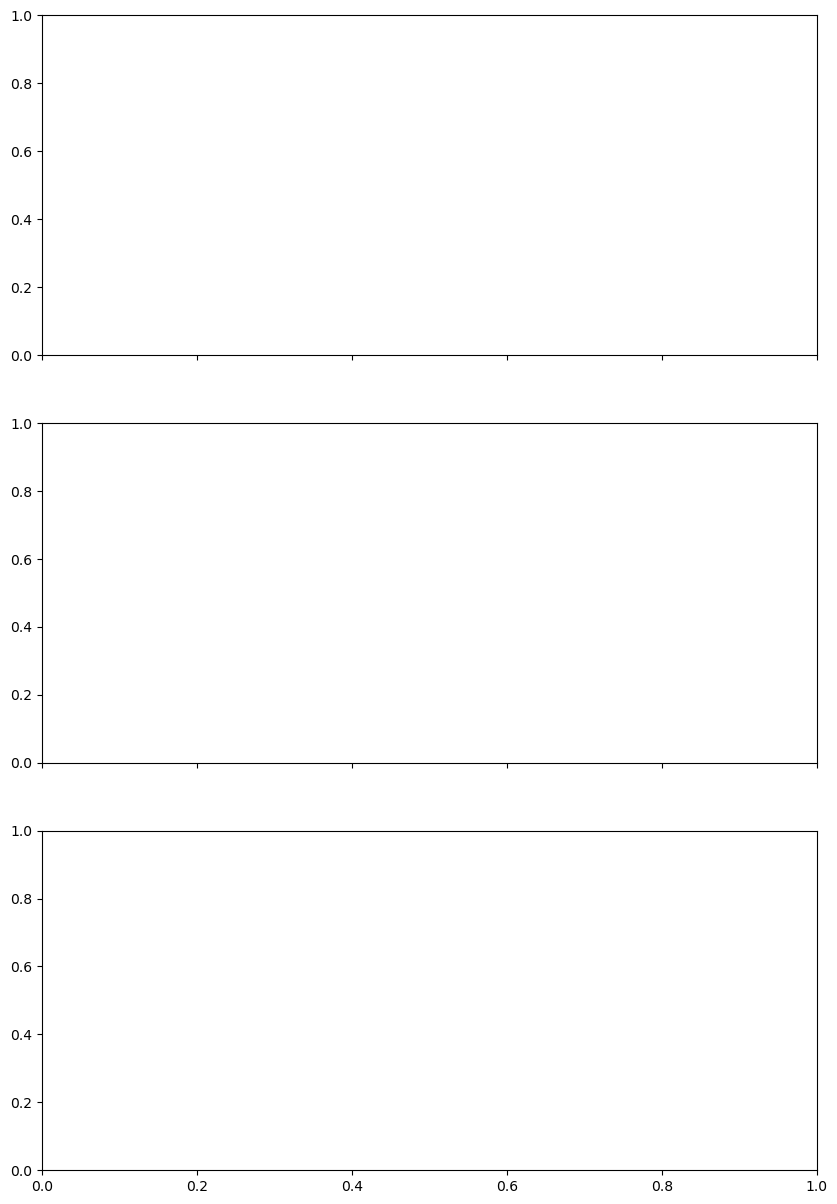

In [45]:
# Define variables
y = "Dev_TSC"
x = "Number of clusters"

# Define the different case names you want to plot
caseNames = CaseNames_Base
# Create subplots
fig, axes = plt.subplots(nrows=len(caseNames), ncols=1, figsize=(10, 15), sharex=True)

# Loop through each caseName and create a subplot
for i,(ax, caseName) in enumerate(zip(axes, caseNames)):
    # Select specific rows and columns from the DataFrame
    rf = results_dfs_pivot.loc[caseName].loc[["R&D","OPT_LB","CHI","OPC","HI"]]
    
    # Create the line plot in the current subplot
    sns.lineplot(data=rf, x=x, y=y, hue="Clustering method", marker="o", ax=ax)
    
    # Set the title of the subplot to indicate the caseName
    ax.set_title(f"Case: {caseName}")
    
    if i != 0:
        ax.legend().remove()

# Adjust layout
plt.tight_layout()

# Optionally save the figure
#plt.savefig(f"Z.Figures/lineplot_subplots_reduced_{y}.png")

# Display the plot
plt.show()

## Count number of times below 1% deviation 

In [63]:
results_dfs_pivot

Cost/Payment                                     Consumption Operation Cost   
Case       Clustering method Number of clusters                               
9n_mod1    CHI               10                                         0.0  \
                             20                                         0.0   
                             30                                         0.0   
                             40                                         0.0   
                             50                                         0.0   
...                                                                     ...   
RTS24_mod1 R&D_fy            200                                        0.0   
                             250                                        0.0   
                             300                                        0.0   
                             350                                        0.0   
                             400                                        0.0   

Cost/Payment                                     Emission              Cost   
Case       Clustering method Number of clusters                               
9n_mod1    CHI               10                                    2.021867  \
                             20                                    5.123021   
                             30                                    5.972603   
                             40                                    5.805730   
                             50                                    5.389083   
...                                                                     ...   
RTS24_mod1 R&D_fy            200                                  34.516172   
                             250                                  34.516172   
                             300                                  35.034218   
                             350                                  35.034218   
                             400                                  35.034218   

Cost/Payment                                     Generation  Operation Cost   
Case       Clustering method Number of clusters                               
9n_mod1    CHI               10                                   40.465906  \
                             20                                   66.926804   
                             30                                   70.046818   
                             40                                   57.716620   
                             50                                   61.283497   
...                                                                     ...   
RTS24_mod1 R&D_fy            200                                  26.797706   
                             250                                  26.797706   
                             300                                  27.155004   
                             350                                  27.155004   
                             400                                  27.155004   

Cost/Payment                                     Generation Investment Cost   
Case       Clustering method Number of clusters                               
9n_mod1    CHI               10                                         0.0  \
                             20                                         0.0   
                             30                                         0.0   
                             40                                         0.0   
                             50                                         0.0   
...                                                                     ...   
RTS24_mod1 R&D_fy            200                                        0.0   
                             250                                        0.0   
                             300                                        0.0   
                             350               

In [65]:
# Assuming 'level_0' is the level of interest, replace 'level_0' with your specific level name or number.
filtered_df = results_dfs_pivot[results_dfs_pivot.index.get_level_values('Clustering method').str.contains("fy")]
filtered_df

Cost/Payment                                     Consumption Operation Cost   
Case       Clustering method Number of clusters                               
9n_mod1    CHI_fy            10                                         0.0  \
                             20                                         0.0   
                             30                                         0.0   
                             40                                         0.0   
                             50                                         0.0   
...                                                                     ...   
RTS24_mod1 R&D_fy            200                                        0.0   
                             250                                        0.0   
                             300                                        0.0   
                             350                                        0.0   
                             400                                        0.0   

Cost/Payment                                     Emission              Cost   
Case       Clustering method Number of clusters                               
9n_mod1    CHI_fy            10                                    5.338184  \
                             20                                    5.338184   
                             30                                    6.145557   
                             40                                    6.145557   
                             50                                    6.145557   
...                                                                     ...   
RTS24_mod1 R&D_fy            200                                  34.516172   
                             250                                  34.516172   
                             300                                  35.034218   
                             350                                  35.034218   
                             400                                  35.034218   

Cost/Payment                                     Generation  Operation Cost   
Case       Clustering method Number of clusters                               
9n_mod1    CHI_fy            10                                   55.057257  \
                             20                                   55.057257   
                             30                                   57.619104   
                             40                                   57.619104   
                             50                                   57.619104   
...                                                                     ...   
RTS24_mod1 R&D_fy            200                                  26.797706   
                             250                                  26.797706   
                             300                                  27.155004   
                             350                                  27.155004   
                             400                                  27.155004   

Cost/Payment                                     Generation Investment Cost   
Case       Clustering method Number of clusters                               
9n_mod1    CHI_fy            10                                         0.0  \
                             20                                         0.0   
                             30                                         0.0   
                             40                                         0.0   
                             50                                         0.0   
...                                                                     ...   
RTS24_mod1 R&D_fy            200                                        0.0   
                             250                                        0.0   
                             300                                        0.0   
                             350               